In [147]:
import xml.etree.ElementTree as ET
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
pasta_raiz = "/Users/Fernando Guirra/Downloads/gerados/gerados/"
pastas = os.listdir(pasta_raiz)
caminho = pasta_raiz + pastas[-1]

In [91]:
with zipfile.ZipFile(caminho + '/' + os.listdir(caminho)[0]) as zip:
    with zip.open(os.listdir(caminho)[0].replace('zip', 'xml')) as file:
        root = ET.fromstring(file.read())
        aux_xml = []
        data = root[0][0][0][0][1].text
        aux_xml.append(data.split(" ")[0])
        for i in range(len(root[0][0][0][0])):
            if 'CROMATOGRAFIA' in root[0][0][0][0][i].tag:
                aux_xml.append(root[0][0][0][0][i].text)

In [105]:
def leitura_xml_gerado(arquivo):
    with zipfile.ZipFile(arquivo) as zip:
        with zip.open(arquivo.split("/")[-1].replace('zip', 'xml')) as file:
            root = ET.fromstring(file.read())
            aux_xml = []
            data = root[0][0][0][0][1].text
            aux_xml.append(data.split(" ")[0])
            for i in range(len(root[0][0][0][0])):
                if 'CROMATOGRAFIA' in root[0][0][0][0][i].tag:
                    aux_xml.append(root[0][0][0][0][i].text)

    return aux_xml

In [107]:
pasta_raiz = "/Users/Fernando Guirra/Downloads/gerados/gerados/"
pastas = os.listdir(pasta_raiz)

cromatografia = []
cont = 0
for pasta in reversed(pastas):
    caminho = pasta_raiz + pasta
    arquivos = os.listdir(caminho)

    for arq in arquivos:
        cromatografia.append(leitura_xml_gerado(caminho + "/" + arq))

    caminho = ''

In [119]:
df = pd.DataFrame(cromatografia, 
             columns = [
                 'DHA_COLETA', 'PCT_CROMATOGRAFIA_NITROGENIO', 'PCT_CROMATOGRAFIA_CO2', 'PCT_CROMATOGRAFIA_METANO', 'PCT_CROMATOGRAFIA_ETANO',
                 'PCT_CROMATOGRAFIA_PROPANO', 'PCT_CROMATOGRAFIA_N_BUTANO', 'PCT_CROMATOGRAFIA_I_BUTANO', 'PCT_CROMATOGRAFIA_N_PENTANO', 
                 'PCT_CROMATOGRAFIA_I_PENTANO', 'PCT_CROMATOGRAFIA_HEXANO', 'PCT_CROMATOGRAFIA_HEPTANO', 'PCT_CROMATOGRAFIA_OCTANO',
                 'PCT_CROMATOGRAFIA_NONANO', 'PCT_CROMATOGRAFIA_DECANO', 'PCT_CROMATOGRAFIA_H2S', 'PCT_CROMATOGRAFIA_AGUA', 'PCT_CROMATOGRAFIA_HELIO',
                 'PCT_CROMATOGRAFIA_OXIGENIO', 'PCT_CROMATOGRAFIA_CO', 'PCT_CROMATOGRAFIA_HIDROGENIO', 'PCT_CROMATOGRAFIA_ARGONIO'
             ])

In [125]:
df.head()

,DHA_COLETA,PCT_CROMATOGRAFIA_NITROGENIO,PCT_CROMATOGRAFIA_CO2,PCT_CROMATOGRAFIA_METANO,PCT_CROMATOGRAFIA_ETANO,PCT_CROMATOGRAFIA_PROPANO,PCT_CROMATOGRAFIA_N_BUTANO,PCT_CROMATOGRAFIA_I_BUTANO,PCT_CROMATOGRAFIA_N_PENTANO,PCT_CROMATOGRAFIA_I_PENTANO,...,PCT_CROMATOGRAFIA_OCTANO,PCT_CROMATOGRAFIA_NONANO,PCT_CROMATOGRAFIA_DECANO,PCT_CROMATOGRAFIA_H2S,PCT_CROMATOGRAFIA_AGUA,PCT_CROMATOGRAFIA_HELIO,PCT_CROMATOGRAFIA_OXIGENIO,PCT_CROMATOGRAFIA_CO,PCT_CROMATOGRAFIA_HIDROGENIO,PCT_CROMATOGRAFIA_ARGONIO
0,01/09/2022,"0,574600","1,585100","85,902700","5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
1,02/09/2022,"0,574600","1,585100","85,902700","5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
2,04/09/2022,"0,574600","1,585100","85,902700","5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
3,04/09/2022,"0,574600","1,585100","85,902700","5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
4,05/09/2022,"0,574600","1,585100","85,902700","5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"


In [151]:
df['DHA_COLETA'] = df['DHA_COLETA'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [167]:
df_filtrado = df[df['DHA_COLETA'] > datetime(2022, 7, 1)]

In [185]:
df_filtrado['PCT_CROMATOGRAFIA_METANO'] = df_filtrado['PCT_CROMATOGRAFIA_METANO'].apply(lambda x: x.replace(",", "."))
df_filtrado['PCT_CROMATOGRAFIA_METANO'] = df_filtrado['PCT_CROMATOGRAFIA_METANO'].astype(float)

C:\Users\Fernando Guirra\AppData\Local\Temp\ipykernel_10964\1209759642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PCT_CROMATOGRAFIA_METANO'] = df_filtrado['PCT_CROMATOGRAFIA_METANO'].apply(lambda x: x.replace(",", "."))
C:\Users\Fernando Guirra\AppData\Local\Temp\ipykernel_10964\1209759642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PCT_CROMATOGRAFIA_METANO'] = df_filtrado['PCT_CROMATOGRAFIA_METANO'].astype(float)


In [187]:
df_filtrado

,DHA_COLETA,PCT_CROMATOGRAFIA_NITROGENIO,PCT_CROMATOGRAFIA_CO2,PCT_CROMATOGRAFIA_METANO,PCT_CROMATOGRAFIA_ETANO,PCT_CROMATOGRAFIA_PROPANO,PCT_CROMATOGRAFIA_N_BUTANO,PCT_CROMATOGRAFIA_I_BUTANO,PCT_CROMATOGRAFIA_N_PENTANO,PCT_CROMATOGRAFIA_I_PENTANO,...,PCT_CROMATOGRAFIA_OCTANO,PCT_CROMATOGRAFIA_NONANO,PCT_CROMATOGRAFIA_DECANO,PCT_CROMATOGRAFIA_H2S,PCT_CROMATOGRAFIA_AGUA,PCT_CROMATOGRAFIA_HELIO,PCT_CROMATOGRAFIA_OXIGENIO,PCT_CROMATOGRAFIA_CO,PCT_CROMATOGRAFIA_HIDROGENIO,PCT_CROMATOGRAFIA_ARGONIO
0,2022-09-01,"0,574600","1,585100",85.9027,"5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
1,2022-09-02,"0,574600","1,585100",85.9027,"5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
2,2022-09-04,"0,574600","1,585100",85.9027,"5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
3,2022-09-04,"0,574600","1,585100",85.9027,"5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
4,2022-09-05,"0,574600","1,585100",85.9027,"5,250600","3,348500","1,347300","0,713300","0,495300","0,604300",...,"0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2022-07-27,"0,550000","2,250000",84.5800,"5,110000","3,350000","1,410000","0,730000","0,520000","0,510000",...,"0,140000","0,080000","0,030000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
86,2022-07-28,"0,550000","2,250000",84.5800,"5,110000","3,350000","1,410000","0,730000","0,520000","0,510000",...,"0,140000","0,080000","0,030000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
87,2022-07-29,"0,550000","2,250000",84.5800,"5,110000","3,350000","1,410000","0,730000","0,520000","0,510000",...,"0,140000","0,080000","0,030000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"
88,2022-07-30,"0,550000","2,250000",84.5800,"5,110000","3,350000","1,410000","0,730000","0,520000","0,510000",...,"0,140000","0,080000","0,030000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000","0,000000"


In [177]:
print(f"Quantidade de dias: {len(df_filtrado['DHA_COLETA'].tolist())}")
print(f"Metano: {len(df_filtrado['PCT_CROMATOGRAFIA_METANO'].tolist())}")

Quantidade de dias: 89
Metano: 89


Text(0.5, 1.0, 'METANO')

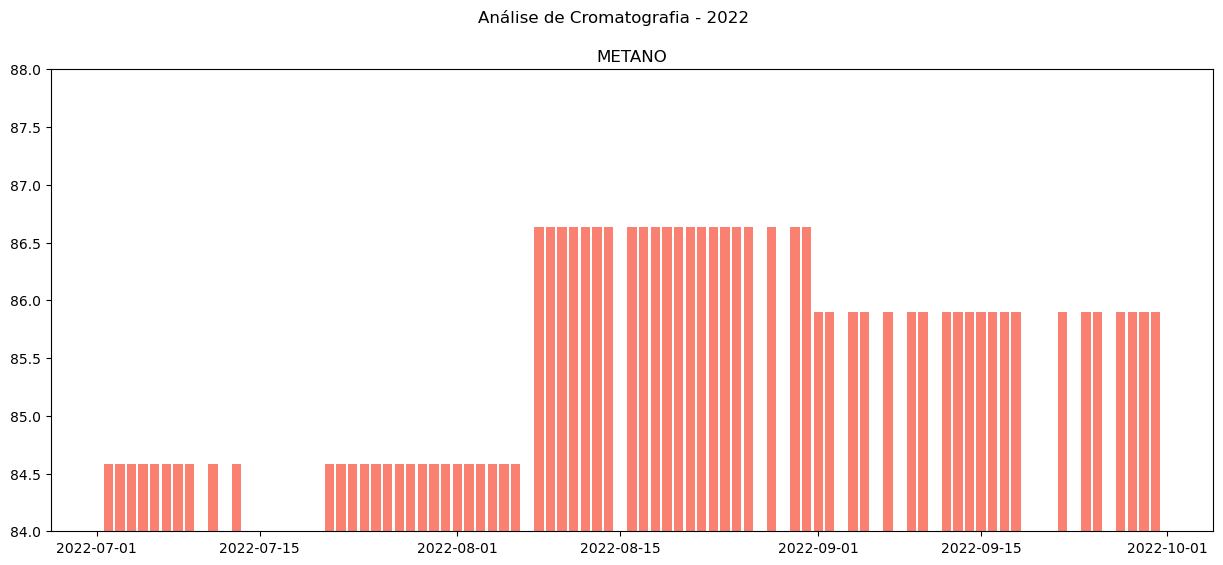

In [237]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(x = df_filtrado['DHA_COLETA'].tolist(), height=df_filtrado['PCT_CROMATOGRAFIA_METANO'].tolist(), color='salmon')
ax.set_ylim(84, 88)
fig.suptitle("Análise de Cromatografia - 2022")
ax.set_title("METANO")
#ax.title("Análise de Cromatografia - Metano")

In [239]:
df_filtrado.groupby(df_filtrado['DHA_COLETA'].dt.to_period("M")).agg({'PCT_CROMATOGRAFIA_METANO':'max'})

,PCT_CROMATOGRAFIA_METANO
DHA_COLETA,
2022-07,84.5800
2022-08,86.6324
2022-09,85.9027
